<a href="https://colab.research.google.com/github/SowjanyaKiran/Time_series_sowanya/blob/main/Time_Series_AirPassengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INSTALLING THE LIBRARIES
!pip install pmdarima

In [ ]:
!pip install numpy==1.26.4

In [ ]:
#INSTALLING THE NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read the data set
df=pd.read_csv("/content/AirPassengers.csv", index_col='Month', parse_dates=True)

In [ ]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
#Summarize the Dataset
df.shape

(144, 1)

In [ ]:
df.dtypes

,0
#Passengers,int64


In [ ]:
#Performing EDA
df.isnull().sum()

,0
#Passengers,0


In [ ]:
#Plot Your Data
df['#Passengers']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

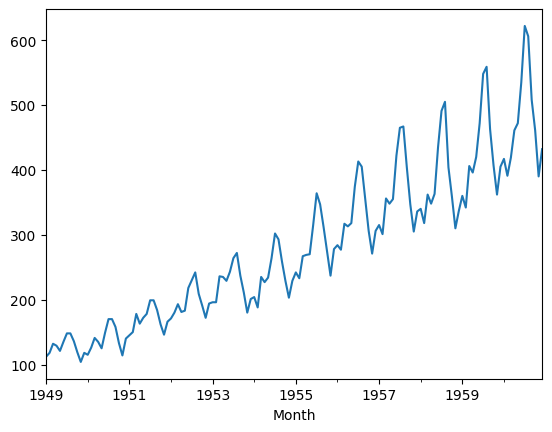

In [ ]:
df['#Passengers'].plot()

In [ ]:
#Figure Out the Order for ARIMA Model
from pmdarima.arima import auto_arima
stepwise_fit = auto_arima(df['#Passengers'],
                          suppress_warnings=True)
print(stepwise_fit.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Fri, 11 Jul 2025   AIC                           1365.825
Time:                        11:21:59   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.3

In [ ]:
#Loading ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Split Data into Training and Testing
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.head(13)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
train = df.iloc[:-12]

In [ ]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [ ]:
test = df.iloc[-12:]

In [ ]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [ ]:
#Train the Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['#Passengers'],order=(4,1,3))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -607.206
Date:                Fri, 11 Jul 2025   AIC                           1230.412
Time:                        11:48:35   BIC                           1253.414
Sample:                    01-01-1949   HQIC                          1239.759
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5693      0.115     -4.968      0.000      -0.794      -0.345
ar.L2          0.4828      0.123      3.935      0.000       0.242       0.723
ar.L3          0.1164      0.128      0.911      0.362      -0.134       0.367
ar.L4         -0.5331      0.084     -6.378      0.000      -0.697      -0.369
ma.L1          0.9304      0.103      8.994      0.000       0.728       1.133
ma.L2         -0.5541      0.151     -3.670      0.000      -0.850      -0.258
ma.L3         -0.7290      0.102     -7.155      0.000      -0.929      -0.529
sigma2       607.4737     76.263      7.965      0.000     458.000     756.947
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                11.03
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.40   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Make Predictions on Test Set
start = len(train)

In [ ]:
end = len(train)+len(test)-1

In [ ]:
start,end

(132, 143)

In [ ]:
pred = model.predict(start=start,end=end)

In [ ]:
pred # Model Prediction

,predicted_mean
1960-01-01,441.014226
1960-02-01,446.034149
1960-03-01,469.988824
1960-04-01,440.043189
1960-05-01,450.040043
1960-06-01,430.002111
1960-07-01,429.978879
1960-08-01,437.445809
1960-09-01,425.521789
1960-10-01,446.595405


In [ ]:
test # Actual Test Data

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


<Axes: xlabel='Month'>

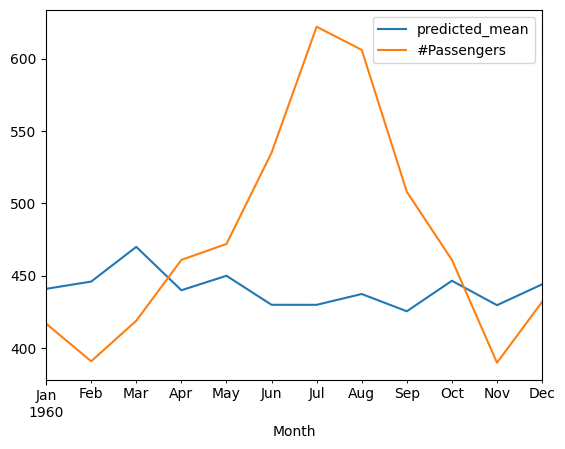

In [ ]:
pred.plot(legend='model_prediction')
test['#Passengers'].plot(legend=True)

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(pred, test['#Passengers']))

print('Root Mean Square Error:',rmse)

Root Mean Square Error: 87.63999545188254
